In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('./data/home.csv', usecols=["relative_time", "AccX", "AccY", "AccZ", "LinearAccelerometerSensor"], na_values="NaN")
data = data.dropna()

ts = data.relative_time/1000 # Use seconds instead of ms
az = np.sqrt(data.AccX**2 + data.AccY**2 + data.AccZ**2)

ts = ts.as_matrix()
az = az.as_matrix()

print(az)

[ 10.34839956  10.34504895  10.3432668   10.31114156  10.33313493
  10.31137413  10.32341105  10.32739544  10.31089531  10.33184946
  10.34276041  10.34522814  10.34882552  10.34831071  10.35369327
  10.29000269  10.30820517  10.31362846  10.31544132  10.48864007
  10.27493408  10.32111285  10.43963956  10.26562971  10.38978194
  10.3456097   10.35705053  10.28751323  10.38514725  10.33767673
  10.37816017  10.34837774  10.38877877  10.33757844  10.36601474
  10.34939289  10.38319269  10.35001782  10.32083744  10.3704192
  10.32879161  10.39308222  10.33537844  10.32057696  10.32385748
  10.34479226  10.35173776  10.34830904  10.34494607  10.36166505
  10.41848584  10.37129657  10.33431875  10.35097583  10.32366069
  10.4114195   10.34702066  10.37263611  10.36601588  10.36449579
  10.35991802  10.37717792  10.33797047  10.32602788  10.36129324
  10.36735799  10.33801032  10.3561145   10.35231219  10.33770016
  10.35334103  10.34505783  10.35302066  10.29264161  10.36308836
  10.409216

In [ ]:
indices = [0, 50, 520, ts.size]
ts_init = ts[indices[0]:indices[1]]
az_init = az[indices[0]:indices[1]]

ts_experiment = ts[indices[1]:indices[2]]
az_experiment = az[indices[1]:indices[2]]

ts_out = ts[indices[2]:indices[3]]
az_out = az[indices[2]:indices[3]]

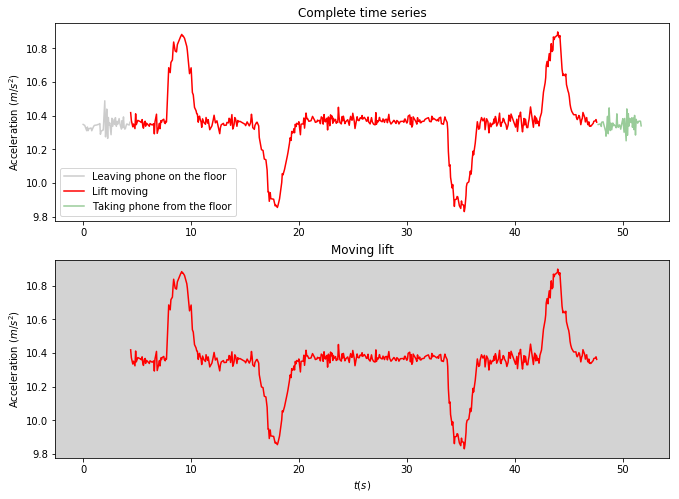

In [10]:
plt.rcParams['figure.figsize'] = (11, 8)
plt.rcParams['font.size'] = 10.0

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)

plt.title('Complete time series')
plt.plot(ts_init, az_init, color='gray', alpha=0.4)
plt.plot(ts_experiment, az_experiment, color='red')
plt.plot(ts_out, az_out, color='green', alpha=0.4)

plt.ylabel('Acceleration $(m / s^2)$')
plt.legend(['Leaving phone on the floor', 'Lift moving', 'Taking phone from the floor']);

ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)
ax2.patch.set_facecolor('lightgray')
plt.title('Moving lift')
plt.plot(ts_experiment, az_experiment, color='red')

plt.xlabel('$t (s)$')
plt.ylabel('Acceleration $(m / s^2)$');

In [5]:
az_experiment_detrended = az_experiment - g g = az_experiment.mean()

In [6]:
from scipy import integrate
import numpy as np

In [7]:
v = np.zeros(ts_experiment.size-1)
for i in range(1, ts_experiment.size):
    y_temp = az_experiment_detrended[:i]
    t_temp = ts_experiment[:i]
    v[i-1] = integrate.simps(y_temp, t_temp)
    
x = np.zeros(ts_experiment.size-2)
for i in range(1, ts_experiment.size-1):
    y_temp = v[:i]
    t_temp = ts_experiment[:i]
    x[i-1] = integrate.simps(y_temp, t_temp)

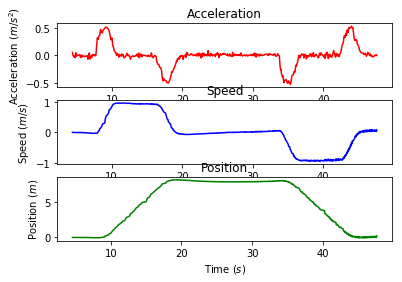

In [9]:
plt.subplot(311)
plt.title('Acceleration')
plt.plot(ts_experiment, az_experiment_detrended, color='red')
plt.ylabel('Acceleration $(m / s^2)$')

plt.subplot(312)
plt.title('Speed')
plot(ts_experiment[1:], v, color='blue')
plt.ylabel('Speed $(m / s)$')

plt.subplot(313)
plt.title('Position')
plot(ts_experiment[2:], x, color='green')
plt.ylabel('Position $(m)$')

plt.xlabel('Time $(s)$');